Computer Vision Object Dectection

Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [1]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.



In [3]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [4]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [5]:
subscription_key = '831dce123edc4de396abb2cfaab747e4'
vision_base_url = 'https://labuser30computervision.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
#이미지 분석을 위한 주소
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인합니다.

In [32]:
image_url = 'https://biz.chosun.com/resizer/QprZwAX-G_tAytmEJQmJ0GHyrns=/616x0/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosunbiz/XABGKMBYM6M37AJ4JX7TVS3VEA.jpg'

In [33]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

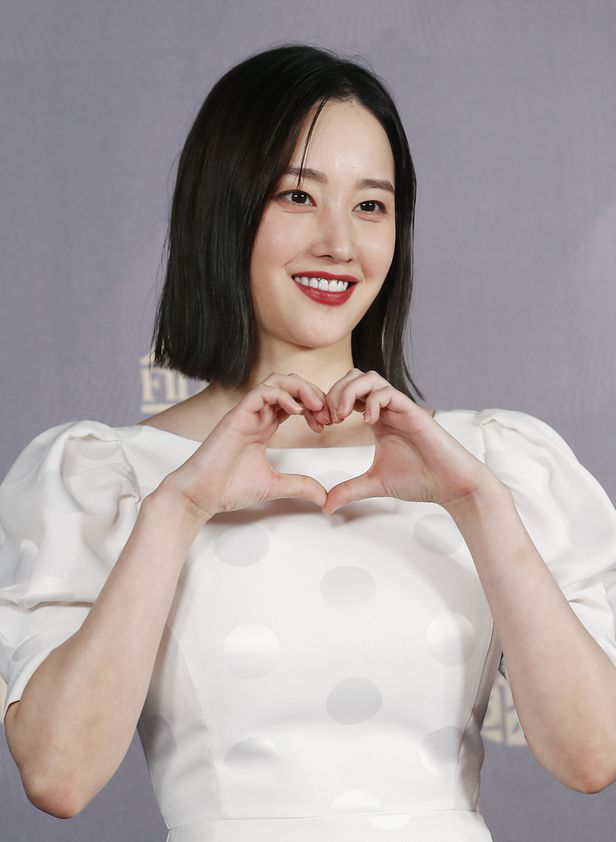

In [34]:
image

In [35]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [36]:
response = requests.post(analyze_url, headers = headers, params = params, json = data) #get or post 2가지 방식으로 웹에서 호출한다.

In [37]:
result = response.json()

In [39]:
result

{'categories': [{'name': 'people_', 'score': 0.98828125}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey', 'White'],
  'accentColor': '92393B',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['person',
   'indoor',
   'clothing',
   'woman',
   'holding',
   'sitting',
   'young',
   'dress',
   'posing',
   'shirt',
   'girl',
   'wedding',
   'wearing',
   'man',
   'table',
   'hair',
   'smiling',
   'bed',
   'standing',
   'cake',
   'room',
   'teeth'],
  'captions': [{'text': 'a person posing for the camera',
    'confidence': 0.8969437079098982}]},
 'requestId': 'bce37f35-3dd6-46ae-9087-2fa8c2ad2094',
 'metadata': {'height': 842, 'width': 616, 'format': 'Jpeg'}}

In [41]:
#가져온 json 파일 뽑아오기
image_caption = result['description']['captions'][0]['text']

In [42]:
image_caption

'a person posing for the camera'

Object Detection

In [43]:
objectDetection_url = vision_base_url + 'detect'

In [44]:
image_url = 'https://cdn.huffingtonpost.kr/news/photo/201602/23030_44978.jpeg'

In [45]:
image = Image.open(BytesIO(requests.get(image_url).content))

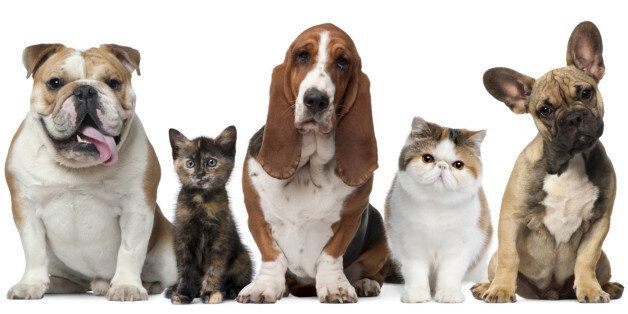

In [46]:
image

In [47]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [48]:
response = requests.post(objectDetection_url, headers=headers, params = params, json = data)

In [50]:
result = response.json()

In [51]:
result

{'objects': [{'rectangle': {'x': 161, 'y': 124, 'w': 90, 'h': 178},
   'object': 'dog',
   'confidence': 0.74,
   'parent': {'object': 'mammal',
    'confidence': 0.838,
    'parent': {'object': 'animal', 'confidence': 0.838}}},
  {'rectangle': {'x': 384, 'y': 111, 'w': 109, 'h': 192},
   'object': 'cat',
   'confidence': 0.696,
   'parent': {'object': 'mammal',
    'confidence': 0.884,
    'parent': {'object': 'animal', 'confidence': 0.884}}},
  {'rectangle': {'x': 3, 'y': 40, 'w': 166, 'h': 264},
   'object': 'dog',
   'confidence': 0.894,
   'parent': {'object': 'mammal',
    'confidence': 0.913,
    'parent': {'object': 'animal', 'confidence': 0.913}}},
  {'rectangle': {'x': 234, 'y': 28, 'w': 154, 'h': 283},
   'object': 'basset hound',
   'confidence': 0.575,
   'parent': {'object': 'hound',
    'confidence': 0.795,
    'parent': {'object': 'dog',
     'confidence': 0.843,
     'parent': {'object': 'mammal',
      'confidence': 0.861,
      'parent': {'object': 'animal', 'confide

In [58]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [67]:
# boundingBox를 위한 함수

def DrawBox(detectData):
  objects = detectData['objects']

  for obj in objects:
    rect = obj['rectangle']

    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    #x,y는 맨 왼쪽 상당 꼭짓점 위치
    draw.rectangle(((x,y),(x+w, y+h)), outline = 'red')          #사각형을 그릴 수 있는 명령어

    #이름 추가하기
    objectName = obj['object']
    draw.text((x,y), objectName, fill = 'black')

In [68]:
DrawBox(result)

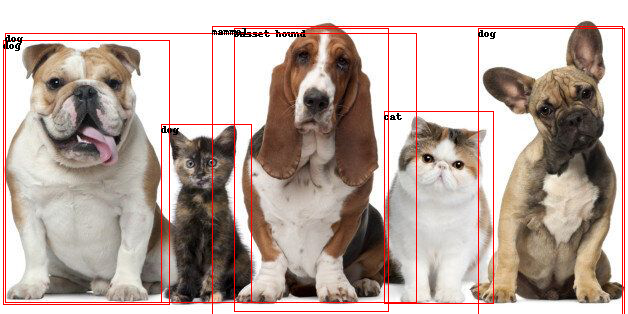

In [69]:
image